In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import pickle

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

([<matplotlib.patches.Wedge at 0x7a00bb6ac940>,
 [Text(-0.9889190739305227, 0.481704333815254, 'Returning_Visitor'),
  Text(0.978255552488044, -0.5030070317861491, 'New_Visitor'),
  Text(1.099742039534667, -0.023821135156215947, 'Other')],
 [Text(-0.5394104039621033, 0.262747818444684, '85.6%'),
  Text(0.5335939377207511, -0.27436747188335403, '13.7%'),
  Text(0.5998592942916365, -0.01299334644884506, '0.7%')])

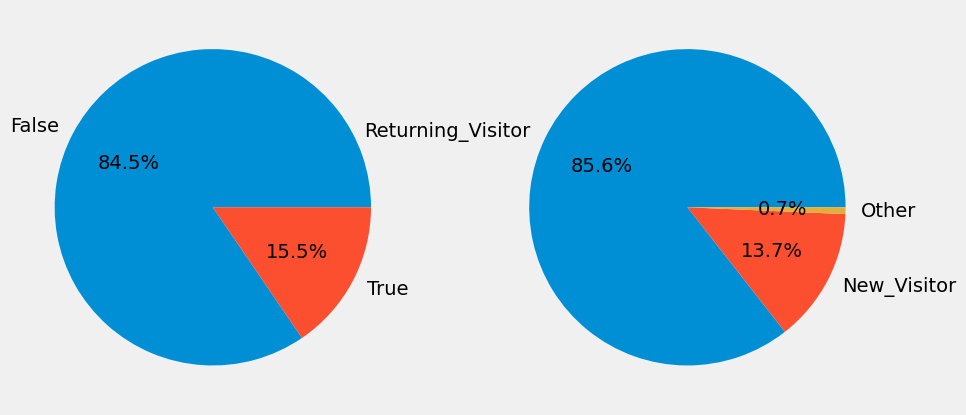

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
x=data['Revenue'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%.1f%%')
plt.subplot(122)
x=data['VisitorType'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%.1f%%')

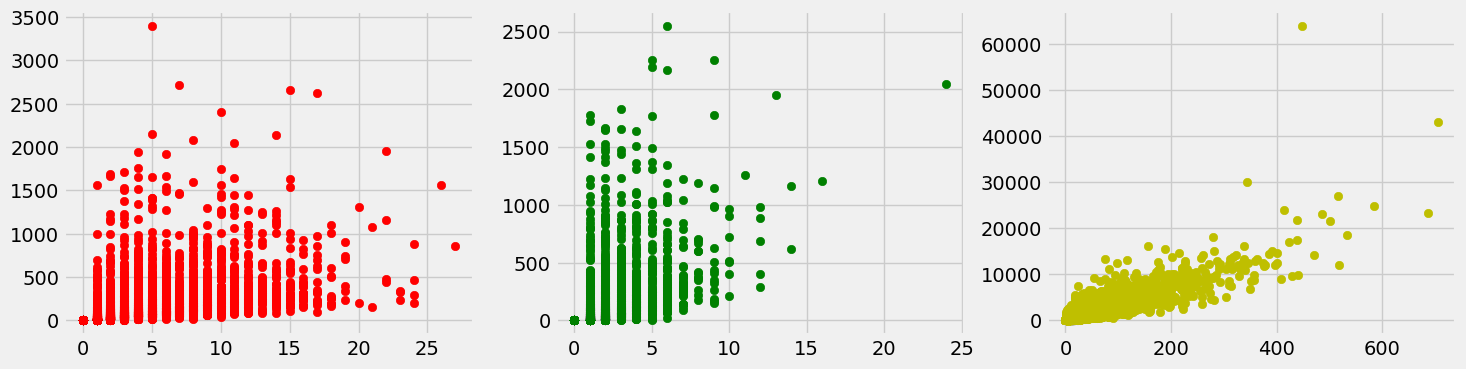

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.scatter(data['Administrative'],data['Administrative_Duration'],color='r')
plt.subplot(132)
plt.scatter(data['Informational'],data['Informational_Duration'],color='g')
plt.subplot(133)
plt.scatter(data['ProductRelated'],data['ProductRelated_Duration'],color='y')

In [ ]:
pd.crosstab(data['Revenue'],data['SpecialDay'])

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Revenue,,,,,,
False,9248,164,230,322,314,144
True,1831,14,13,29,11,10


In [ ]:

pd.crosstab([data['Month'],data['VisitorType']],data['Revenue'])

Revenue                  False  True 
Month VisitorType                    
Aug   New_Visitor           51     21
      Returning_Visitor    306     55
Dec   New_Visitor          260     75
      Other                 49     13
      Returning_Visitor   1202    128
Feb   New_Visitor            1      0
      Returning_Visitor    180      3
Jul   New_Visitor           43     11
      Returning_Visitor    323     55
June  New_Visitor           23      7
      Other                  1      0
      Returning_Visitor    235     22
Mar   New_Visitor          196     36
      Returning_Visitor   1519    156
May   New_Visitor          231     88
      Returning_Visitor   2768    277
Nov   New_Visitor          291    128
      Other                 19      3
      Returning_Visitor   1928    629
Oct   New_Visitor           96     28
      Returning_Visitor    338     87
Sep   New_Visitor           80     28
      Returning_Visitor    282     58

In [ ]:
data.describe(include='all')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
le=LabelEncoder()
data['Month']=le.fit_transform(data['Month'])
data['VisitorType']=le.fit_transform(data['VisitorType'])
data['Weekend']=le.fit_transform(data['Weekend'])
data['Revenue']=le.fit_transform(data['Revenue'])

In [ ]:
datakmeans=data.drop('Revenue',axis=1)

In [ ]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(datakmeans)
datakmeans=pd.DataFrame(scaled_data,columns=datakmeans.columns)
datakmeans.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0


In [ ]:
n_cluster=range(1,10,1)
SSe=[]
for i in n_cluster:
    k=KMeans(n_clusters=i)
    ypred=k.fit(scaled_data)
    SSe.append(k.inertia_)

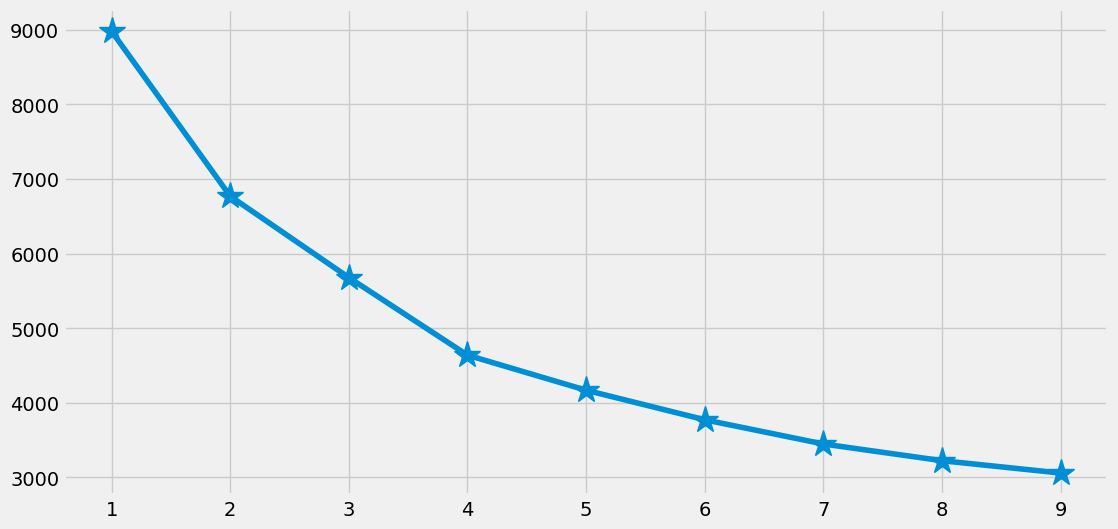

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(n_cluster,SSe,marker='*',markersize=20)

In [ ]:
km=KMeans(n_clusters=4)
ypred=km.fit_predict(datakmeans)

In [ ]:
pca=PCA(n_components=2)
dataPCA=pca.fit_transform(datakmeans)
dataPCA

array([[-0.44925111,  0.80069766],
       [-0.28170418,  0.14437368],
       [-0.44574738,  0.7319541 ],
       ...,
       [ 0.66593704,  0.54944341],
       [-0.21694675, -0.03510955],
       [ 0.87942437, -0.43152567]])

In [ ]:
dataPCA=pd.DataFrame(dataPCA,columns=['PCA1','PCA2'])
dataPCA.head()

,PCA1,PCA2
0,-0.449251,0.800698
1,-0.281704,0.144374
2,-0.445747,0.731954
3,-0.333652,0.338048
4,0.709525,0.299958


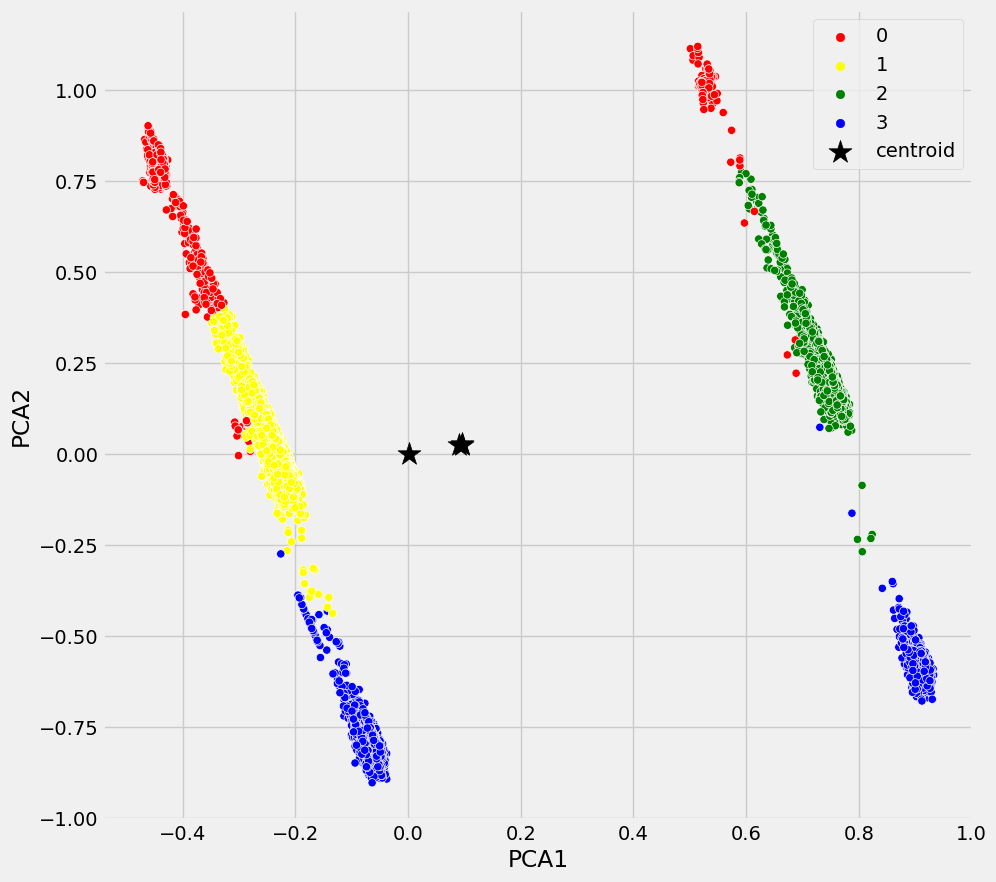

In [ ]:
dataPCA['cluster']=ypred
plt.figure(figsize=(10,10))
sns.scatterplot(x=dataPCA['PCA1'],y=dataPCA['PCA2'],hue = dataPCA['cluster'],palette=['red','yellow','green','blue'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',s=300,marker='*',label='centroid')
plt.legend()

In [ ]:
x=data.drop('Revenue',axis=1)
y=data['Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
def logisticReg(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    ypred=ir.predict(x_tests)
    print('***logisticRegression***')
    print('confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('classification report')
    print(classification_report(y_test,ypred))

In [ ]:
def randomForest(x_train,x_test,y_train,y_test):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    ypred=rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('classificatication report')
    print(classification_report(y_test,ypred))

In [ ]:
def compareModel(x_train,x_test,y_train,y_test):
    logisticReg(x_train,x_test,y_train,y_test)
    print('-'*100)
    randomForest(x_train,x_test,y_train,y_test)

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)
cv=cross_val_score(rf,x,y,cv=5)
np.mean(cv)
pickle.dump(rf,open('model.pkl','wb'))